In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression
import joblib

In [269]:
df=pd.read_csv("tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Data Exploration

In [4]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


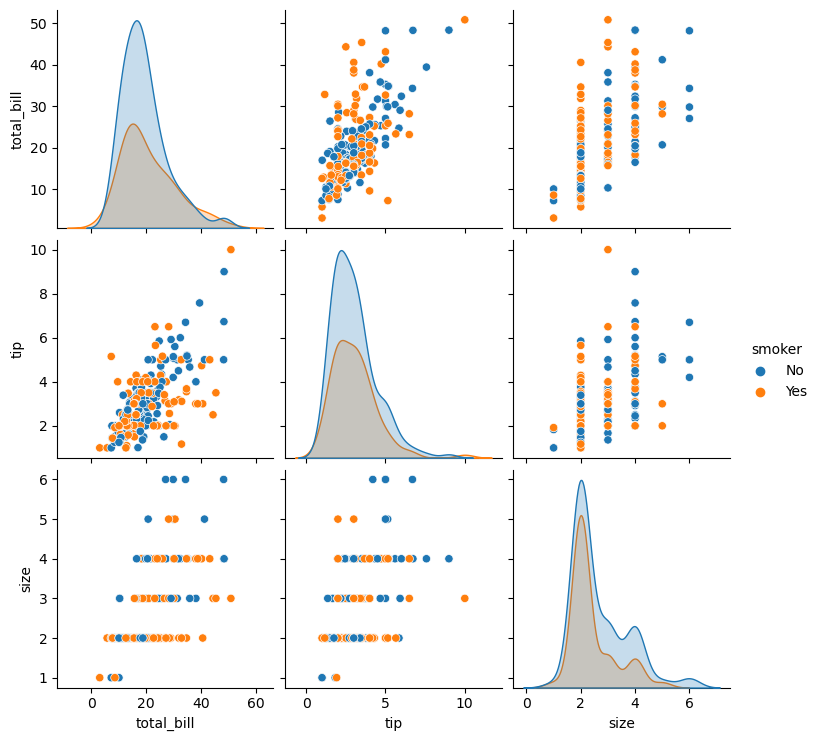

In [7]:
sns.pairplot(df,hue='smoker') 

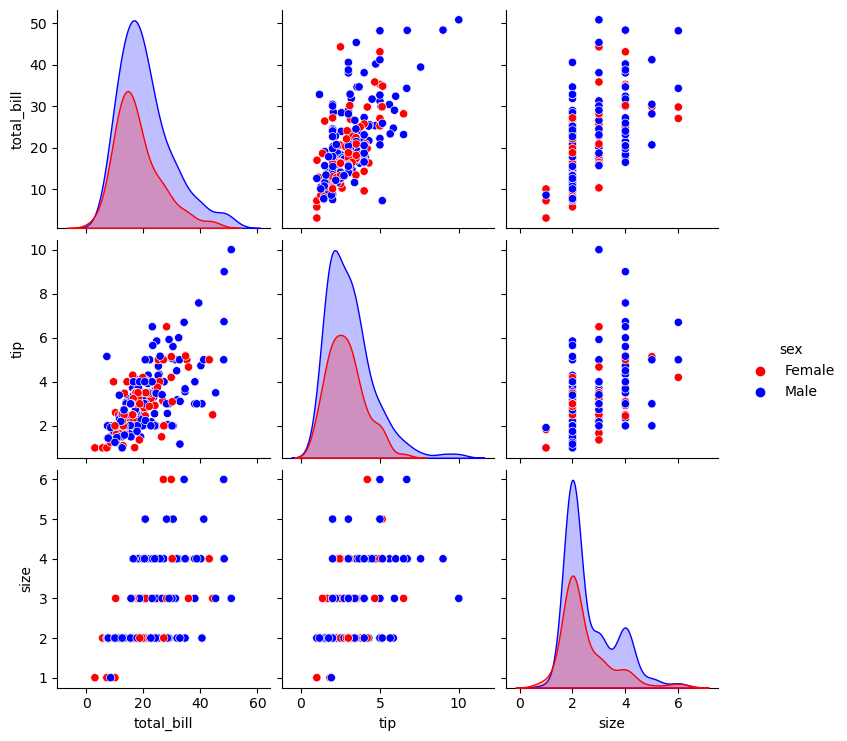

In [10]:
custom_palette = {"Female": "red", "Male": "blue"}
sns.pairplot(df,hue='sex',palette=custom_palette)

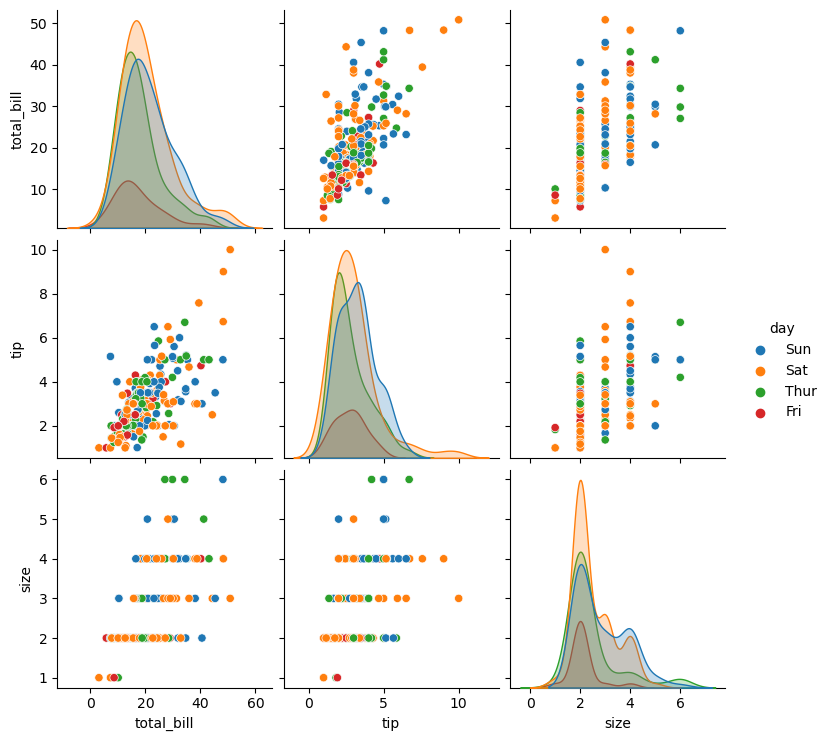

In [11]:
sns.pairplot(df,hue='day')

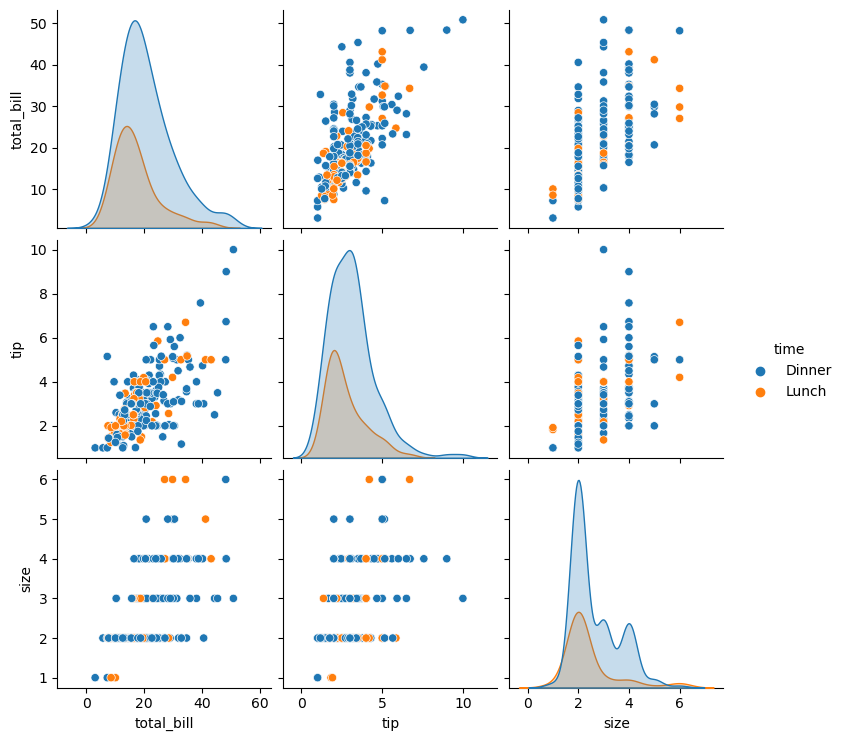

In [12]:
sns.pairplot(df,hue='time')

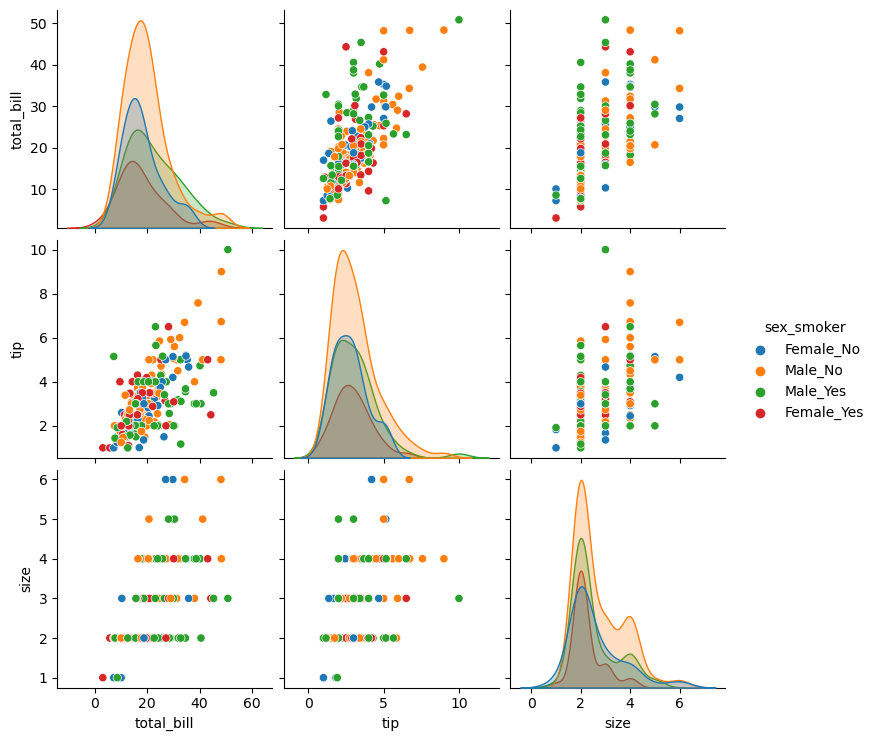

In [99]:
df['sex_smoker'] = df['sex'] + '_' + df['smoker']

# Create a pair plot using the new column as hue
sns.pairplot(df, hue='sex_smoker')

C:\Users\ammar\AppData\Local\Temp\ipykernel_276\1215065306.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


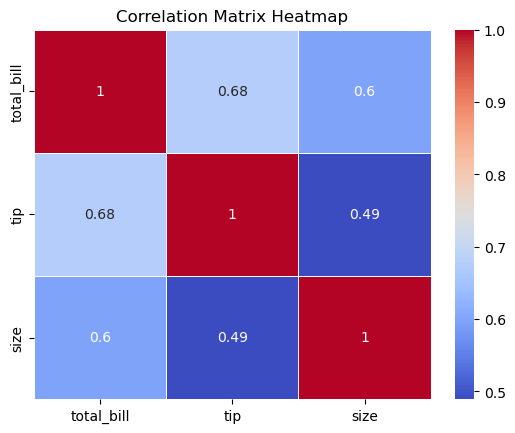

In [254]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: xlabel='total_bill', ylabel='tip'>

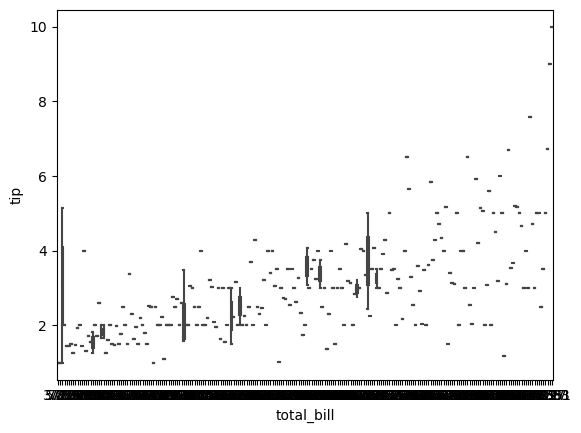

In [256]:
sns.boxplot(x='total_bill', y='tip', data=df)

## Conclusion

- we can see from the above graph that the non-smoker tips are higher than the smoker, they also tend to have higher total bill, and also arrive in a higher headcount
- based on gender, male are more likely to tip higher than female, the bill size is also likely to be higher for males
- non smoker males are the highest tippers and their total bill is highest where as smoker females are the lowest tippers and their total bill is lowest
- dinners on saturday are the busiest and their total bill and tips are highest

In [268]:
#df= df.drop('sex_smoker', axis=1)

## Applying linear regression model through scikit-learn


In [270]:
# One-hot encode categorical variables
#en =encoded dataframe
en = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
en

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,1,0,0,0
240,27.18,2.00,2,0,1,1,0,0,0
241,22.67,2.00,2,1,1,1,0,0,0
242,17.82,1.75,2,1,0,1,0,0,0


In [271]:
X=en.drop('tip',axis =1)
y=en['tip']


In [272]:
scaler = StandardScaler()
X[['total_bill', 'size']] = scaler.fit_transform(X[['total_bill', 'size']])


In [273]:
kbest = SelectKBest(k=4, score_func=f_regression)
k_best_features = kbest.fit_transform(X, y)
list(X.columns[kbest.get_support (indices=True)])

['total_bill', 'size', 'day_Sun', 'time_Lunch']

In [274]:
X_train, X_test, y_train, y_test = train_test_split(k_best_features, y, test_size=0.2, random_state=42)
model = LinearRegression()

In [275]:
model.fit(X_train, y_train)

LinearRegression()

In [276]:
y_pred = model.predict(X_test)

In [277]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Value: {r2}")

Mean Squared Error: 0.6645339682782493
R-squared Value: 0.4683606381926968


In [282]:
joblib.dump(model, 'C:/Users/ammar/tips_model.pkl')

['C:/Users/ammar/tips_model.pkl']